In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading the file
df = pd.read_csv('heart.csv')
df.isnull().sum() #Checking if there are null values.....
df.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


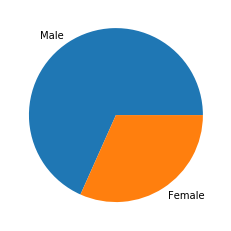

In [8]:
 #Checking the number of Male and Female Patients
male =len(df[df['sex'] == 1]) 
female = len(df[df['sex']== 0])

labels = 'Male','Female'
sizes = [male,female]
plt.pie(sizes, labels=labels)

plt.show()
    

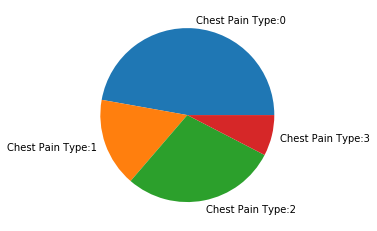

In [9]:
#Checking the percentage of type of chest pain
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(df[df['cp'] == 0]),len(df[df['cp'] == 1]),
         len(df[df['cp'] == 2]),
         len(df[df['cp'] == 3])]
plt.pie(sizes, labels=labels)
plt.show()

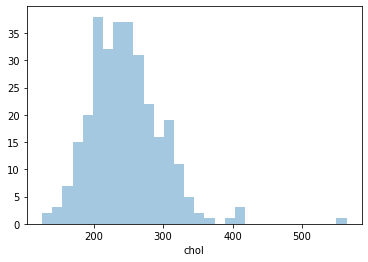

In [11]:
#Displaying histogram for Cholestrol in patients.
sns.distplot(df['chol'],kde=False,bins=30)
plt.show()

In [24]:
#Training the Dataset for prediction of Heart Disease
X= df.drop('target',axis=1)
y=df['target']
from sklearn.metrics import accuracy_score #importing accuracy score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #created scalar object
#training the data
X_train_scaled = scaler.fit_transform(X_train) 
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)


In [25]:

#Prediction of Heart disease using the KNN algorithm.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn =KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,33,2)]} #getting the best params values
model = GridSearchCV(knn,params,cv=10)
model.fit(X_train,y_train)   
predict = model.predict(X_test)

print('The accuracy obtained using k-NN is : ',accuracy_score(y_test,predict))
print('Resultant in percentage : ',
      round(accuracy_score(y_test,predict),5)*100,'%age')

The accuracy obtained using k-NN is :  0.8461538461538461
Resultant in percentage :  84.615 %age


c:\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
####### Using Decision tree algorithm to get the Accuracy.
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [30]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)
tree_model.fit(X_train,y_train)

predict = tree_model.predict(X_test)

from sklearn.metrics import accuracy_score
print('Decision Tree accuracy : ',accuracy_score(y_test,predict))
print('ACCURACY is : ',
      round(accuracy_score(y_test,predict),5)*100,'%')

c:\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Decision Tree accuracy :  0.7252747252747253
ACCURACY is :  72.527 %


c:\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
